# Data Science Programming Assignment 3 - Group 12

- Submitted by - Aswathy Gopalakrishnan, Roshna Roy, Yonge Li

**The dataset used is "Yield per hectar and total production in regions/country for different crops. Yearly data 1965 - 2023". Eventhough data is available from 1965, the last 10 years of data is considered for exploring the tasks in hand.**

In [186]:
try:
    from rich import load_ipython_extension
    %load_ext rich
except ImportError:
    try:
        from rich import pretty
        pretty.install()
    except ImportError:
        pass

In [198]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Here, we are using the preprocessed yield data from Assignment 1

In [196]:
data = "preprocessed_yield_data.csv"
df = pd.read_csv(data)
df.head()

region           crop    2014    2015    2016    2017    2018  \
0  01 Stockholm county   winter wheat  6340.0  6350.0  5710.0  5920.0  3890.0   
1  01 Stockholm county  spring barley  4180.0  4140.0  4190.0  4330.0  2250.0   
2  01 Stockholm county           oats  3980.0  3620.0  2900.0  3780.0  1550.0   
3  01 Stockholm county           peas  3230.0  3400.0  3490.0  2900.0  1590.0   
4  01 Stockholm county    winter rape  3050.0  3420.0  3050.0  3140.0  1740.0   

     2019    2020    2021    2022    2023  mean_production  
0  6420.0  7010.0  5700.0  6210.0  4530.0           5808.0  
1  3630.0  4570.0  2540.0  4580.0  2070.0           3648.0  
2  3820.0  4420.0  2710.0  4250.0  2500.0           3353.0  
3  3060.0  3340.0  1990.0  3510.0  1790.0           2830.0  
4  3020.0  3480.0  2930.0  2350.0  1790.0           2797.0

- - -

# Tasks Based on Exercise 2: Visualization with Seaborn for Exploratory Data Analysis


These tasks contains exercises on data visualization using the Seaborn library. In particular, we'll focus on _exploratory data analysis:_ trying to understand your dataset better by producing plots. This exercise focuses on what different plot types there are, how to use them, and what they mean.


- - - 
## Data cleaning


In this exercise, advanced data visualisations using Seaborn library is explored. It focuses on making _high-quality plots_ that involve tweaking and customizing certain aspects of the plot styling.

**1. How many `NaN` values are there in each column?** This information might help us decide what strategy we want to use for cleaning the dataset.

In [189]:
df.isna().sum()

region             0
crop               0
2014               0
2015               0
2016               0
2017               0
2018               0
2019               0
2020               0
2021               0
2022               0
2023               0
mean_production    0
dtype: int64

<div class="alert alert-block alert-success">
<p>Here shows that no missing values in our dataset because we have cleaned it in assignment 1, so we don't need to use 'df = df.dropna()' to drop the NaN value rows.<p>

**2. check the dataset information to know the data better so that we can decide which can be used with their unique values**

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           186 non-null    object 
 1   crop             186 non-null    object 
 2   2014             186 non-null    float64
 3   2015             186 non-null    float64
 4   2016             186 non-null    float64
 5   2017             186 non-null    float64
 6   2018             186 non-null    float64
 7   2019             186 non-null    float64
 8   2020             186 non-null    float64
 9   2021             186 non-null    float64
 10  2022             186 non-null    float64
 11  2023             186 non-null    float64
 12  mean_production  186 non-null    float64
dtypes: float64(11), object(2)
memory usage: 19.0+ KB


**3. Find out which unique values there are for `region` and `crop`, as well as the min/max/mean of the numeric columns.** This might be helpful in deciding how to visualize this dataset later!

In [191]:

print(df['region'].unique())
print('---'*30)
print(df['crop'].unique())
print('---'*30)
df.describe()

['01 Stockholm county' '03 Uppsala county' '04 Sdermanland county'
 '05 stergtland county' '06 Jnkping county' '07 Kronoberg county'
 '08 Kalmar county' '09 Gotland county' '10 Blekinge county'
 '12 Skne county' '13 Halland county' '14 Vstra Gtaland county'
 '17 Vrmland county' '18 rebro county' '19 Vstmanland county'
 '20 Dalarna county' '21 Gvleborg county' '22 Vsternorrland county'
 '23 Jmtland county' '24 Vsterbotten county' '25 Norrbotten county']
------------------------------------------------------------------------------------------
['winter wheat' 'spring barley' 'oats' 'peas' 'winter rape'
 'temporary grasses' 'temporary grasses. First cut' 'spring wheat'
 'spring rape' 'temporary grasses. Re-growth' 'Winter triticale'
 'field beans' 'rye' 'winter barley' 'table potatoes' 'oil flax'
 'potatoes for processing of starch' 'sugar beets' 'corn' 'mixed grain']
------------------------------------------------------------------------------------------


2014          2015          2016          2017          2018  \
count    186.000000    186.000000    186.000000    186.000000    186.000000   
mean    7098.629032   7018.075269   6928.043011   7012.661290   5237.639785   
std    11188.518928   9609.593136  10400.263444  10296.038731   9051.651801   
min     1253.000000    890.000000    990.000000    830.000000    930.000000   
25%     3165.000000   3472.500000   3155.000000   3210.000000   1995.000000   
50%     3970.000000   4405.000000   4260.000000   4130.000000   2605.000000   
75%     5800.000000   5950.000000   5377.500000   6017.500000   3855.000000   
max    73600.000000  61100.000000  65200.000000  63400.000000  55400.000000   

               2019          2020          2021         2022          2023  \
count    186.000000    186.000000    186.000000    186.00000    186.000000   
mean    7357.064516   7185.731183   6615.725806   7069.33871   6045.489247   
std    11371.409382  10925.941559  10972.967810  10580.66922  10412.858624   
min      990.000000    720.000000   1320.000000   1010.00000   1190.000000   
25%     3222.500000   3132.500000   2800.000000   3205.00000   2232.500000   
50%     4165.000000   4175.000000   3385.000000   4215.00000   2965.000000   
75%     6205.000000   5907.500000   5247.500000   5890.00000   4552.500000   
max    74800.000000  68200.000000  71700.000000  64800.00000  63300.000000   

       mean_production  
count       186.000000  
mean       6756.849462  
std       10441.720537  
min        1253.000000  
25%        2982.000000  
50%        3786.500000  
75%        5445.000000  
max       65880.000000

- - -
## Plotting data distributions


**4. Produce a histogram of the yield in 2019 year with 30 bins.**  We do this by using (a) the Pandas API, and (b) the Seaborn API. In practice (and in the assignments/exam), it does not matter _how_ you arrive at a solution – but it can be a good exercise to try out different ways to achieve the same result. How do the plots generated by these two different methods differ? Could you explain what they tell us about the distribution of the body mass?

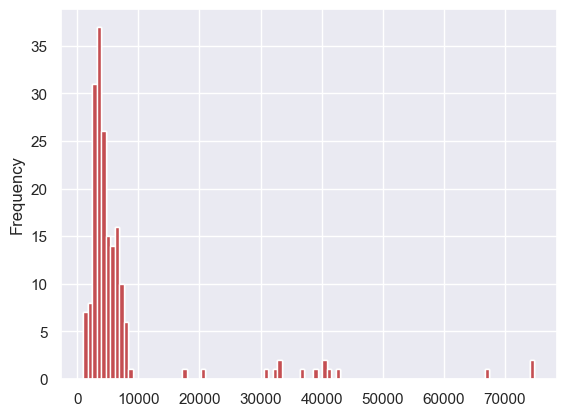

In [199]:
# using Pandas API
df['2019'].plot.hist(bins=100);
plt.show()


we plot the histogram of yield in 2019 with 100 bins to show more details use the pandas API.

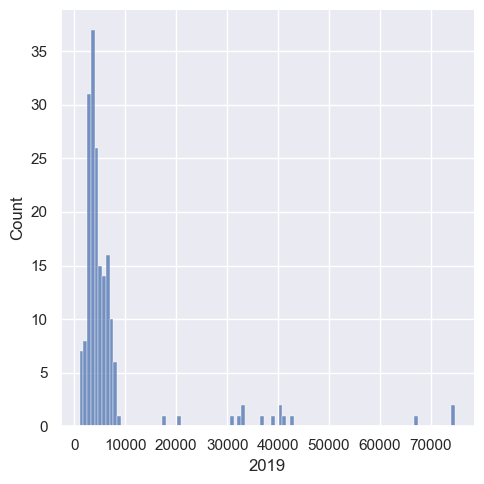

In [202]:
# using Seaborn API

sns.displot(data=df, x='2019',bins=100)
plt.show()

We can see that the default figure sizes & axis labels are slightly different between the two methods.

Also, it can be seen that in 2019, the majority of regions and crops had a production of less than 10000 tons, with the highest frequency concentrated in the 3000 to 8000-ton range. As the production increases rapidly, the number of regions decreases repidly.

however, there are still a few extremely high values in the high-production areas.


Now lets explore more details about the high values!

In [204]:
print("the most yield in 2019 is:",df['2019'].max())
print('---'*30)
print("list the counties which yield more than 70000 tons in 2019: \n",df.loc[df['2019'] > 70000])

the most yield in 2019 is: 74800.0
------------------------------------------------------------------------------------------
list the counties which yield more than 70000 tons in 2019: 
                 region         crop     2014     2015     2016     2017  \
97      12 Skne county  sugar beets  73600.0  61100.0  65200.0  63400.0   
110  13 Halland county  sugar beets  69900.0  54600.0  58100.0  56700.0   

        2018     2019     2020     2021     2022     2023  mean_production  
97   55400.0  74800.0  68200.0  71700.0  64800.0  60600.0          65880.0  
110  55400.0  74700.0  66300.0  65800.0  62100.0  63300.0          62690.0  


Here we can know that both of Skne county and Halland county had their sugar beets yield more than 70000 tons in 2019.
Bravo! 

**5. Produce a histogram of yield in 2019 that also conditions on crops.** In other words, play around with visualizations that show the distribution of different crops yield in 2019.

Try out the different options Seaborn provides to combine the histogram bars (e.g., "stacking" vs. "layering" vs. "dodging")

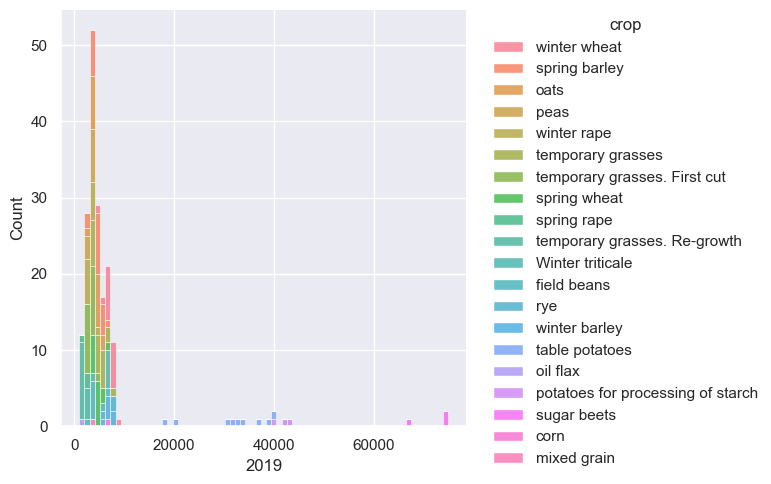

In [207]:
sns.displot(data= df, x= '2019', hue='crop', multiple ='stack')
plt.show()

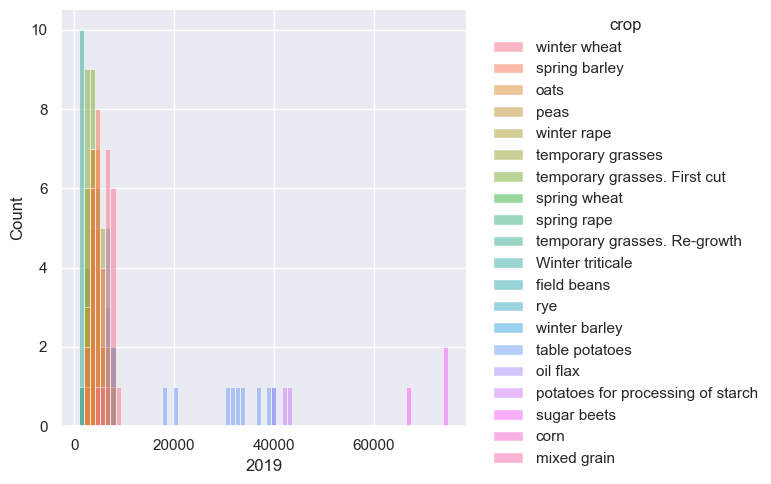

In [210]:
sns.displot(data=df, x='2019',hue='crop',multiple='layer')
plt.show()

From the graph, we can see that Temporary grasses, spring wheat, and spring barley appear frequently in the lower range, suggesting these crops are more commonly grown in smaller areas or units.
A few crops (like corn, sugar beets, and potatoes for processing) have much higher values, extending toward 60,000–80,000.

**6. Produce a histogram of yield in 2019 that also conditions on region. In other words, play around with visualizations that show the distribution of different crops yield in 2019.** 

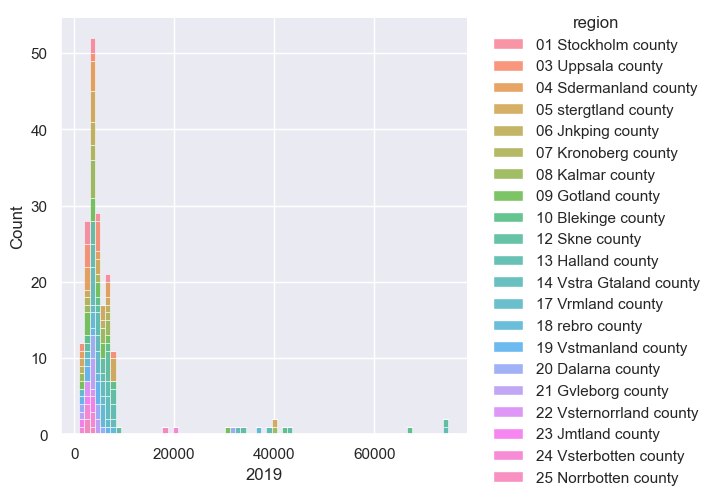

In [211]:
sns.displot(data= df, x='2019',hue= 'region',multiple = 'stack')
plt.show()

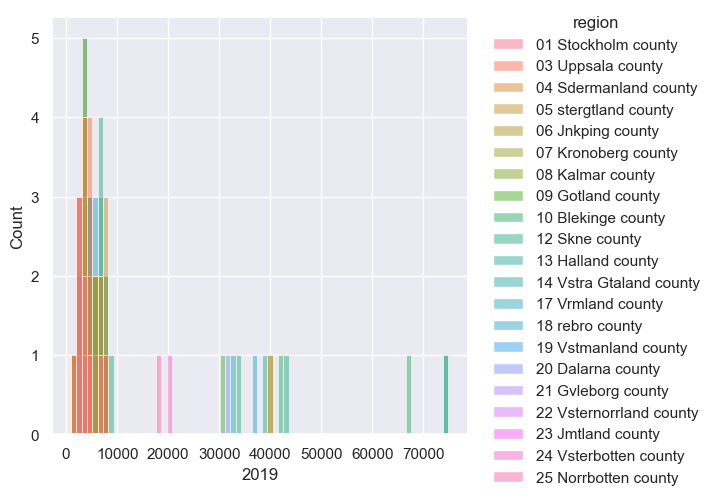

In [212]:
sns.displot(data=df, x='2019',hue='region',multiple='layer')
plt.show()

**7. Turn one of your histograms into a KDE plot.** Again, Seaborn makes this easy by just changing one keyword argument. But what does that KDE plot tell you? How does it differ from the histogram? Which one do you find more useful on the variables you looked at?

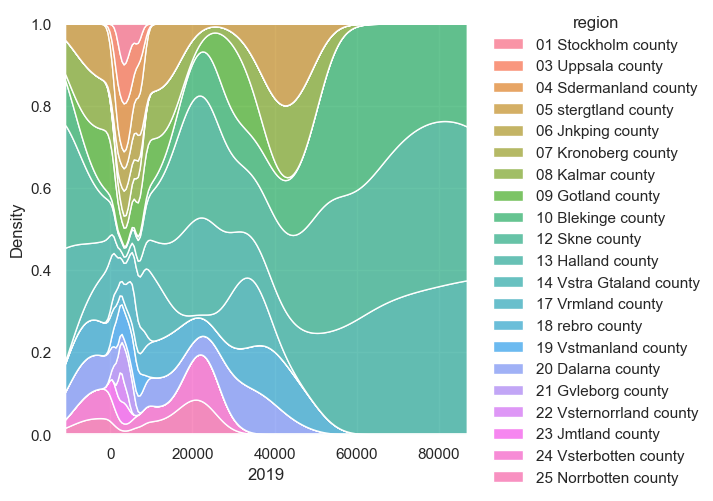

In [213]:
sns.displot(data=df, x='2019',hue='region',multiple='fill',kind='kde')
plt.show()

- - -
## Plotting relationships between variables


In [214]:
df_long= df.melt(
    id_vars= ['region','crop'],
    value_vars=[str(year) for year in range (2014,2024)],
    var_name='year',
    value_name='production'
)

df_long['year']=df_long['year'].astype(int)

df_long

region                          crop  year  production
0       01 Stockholm county                  winter wheat  2014      6340.0
1       01 Stockholm county                 spring barley  2014      4180.0
2       01 Stockholm county                          oats  2014      3980.0
3       01 Stockholm county                          peas  2014      3230.0
4       01 Stockholm county                   winter rape  2014      3050.0
...                     ...                           ...   ...         ...
1855  24 Vsterbotten county  temporary grasses. Re-growth  2023      1350.0
1856   25 Norrbotten county                 spring barley  2023      2310.0
1857   25 Norrbotten county                table potatoes  2023     17189.0
1858   25 Norrbotten county             temporary grasses  2023      4560.0
1859   25 Norrbotten county  temporary grasses. First cut  2023      2610.0

[1860 rows x 4 columns]

Let's show the relationship between two _numeric_ variables:

**8. Make a scatter plot showing the relationship between year and production.** 

In order to plot relationships between numeric variables, we convert the datafram to long form first.

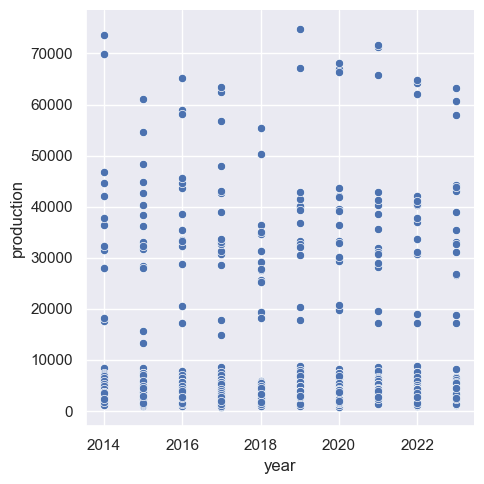

In [ ]:
sns.relplot(data= df_long, x='year',y='production');
plt.show()

here we can see that most data points are clustered in the lower production value range 0-10000

Let's add a categorical variable, so that we're now visualizing _three_ different variables in one plot:

**9. Make the same scatter plot as in Q8, but add _color_ (or, as Seaborn calls it, _hue_) to condition on crop.**

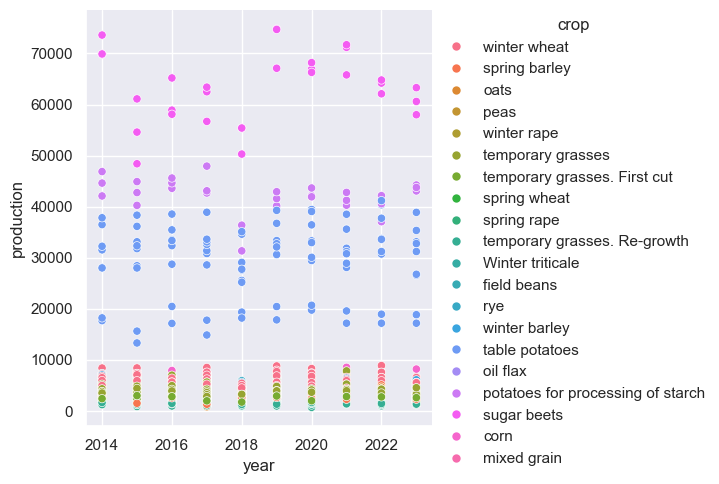

In [ ]:
sns.relplot(data= df_long, x='year',y='production', hue= 'crop');
plt.show()

From the catter chart ablove, More clearly now, in the past ten years, sugar beets always keep the higher produce which is more than 50000 tons every year.

**10. Plot a _linear regression_ between year and productions, both with and without conditioning on the crop.**  Note that you'll need to use a different Seaborn function for the latter case, although the parameters don't change much.

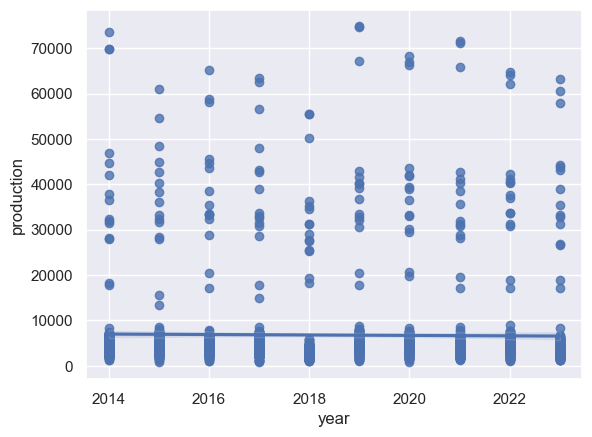

In [ ]:
#"simple" linear regression (WITHOUT conditioning on the crop)
sns.regplot(data=df_long, x='year',y='production');
plt.show()

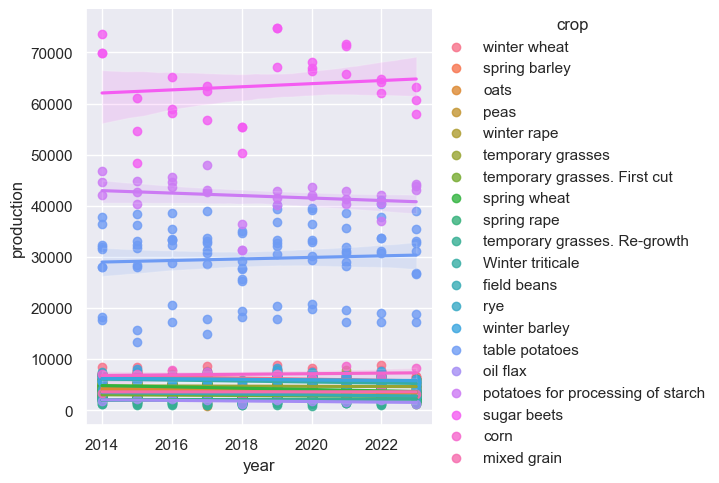

In [218]:
# multiple linear regressions (conditioning on the crop)

sns.lmplot(data= df_long, x='year',y='production', hue= 'crop');
plt.show()

The graph shows that in the past ten years, the yield for most of crops almost keep stable in the same region.

Let's extend our visualization to _four_ variables. Seaborn offers "facet grids" as a way to quickly produce multiple plots in a grid, where the columns (and/or rows) represent our fourth variable.

**11. Make a _facet grid_ that's the same as Q9, but distinguishes the region in separate columns.**  

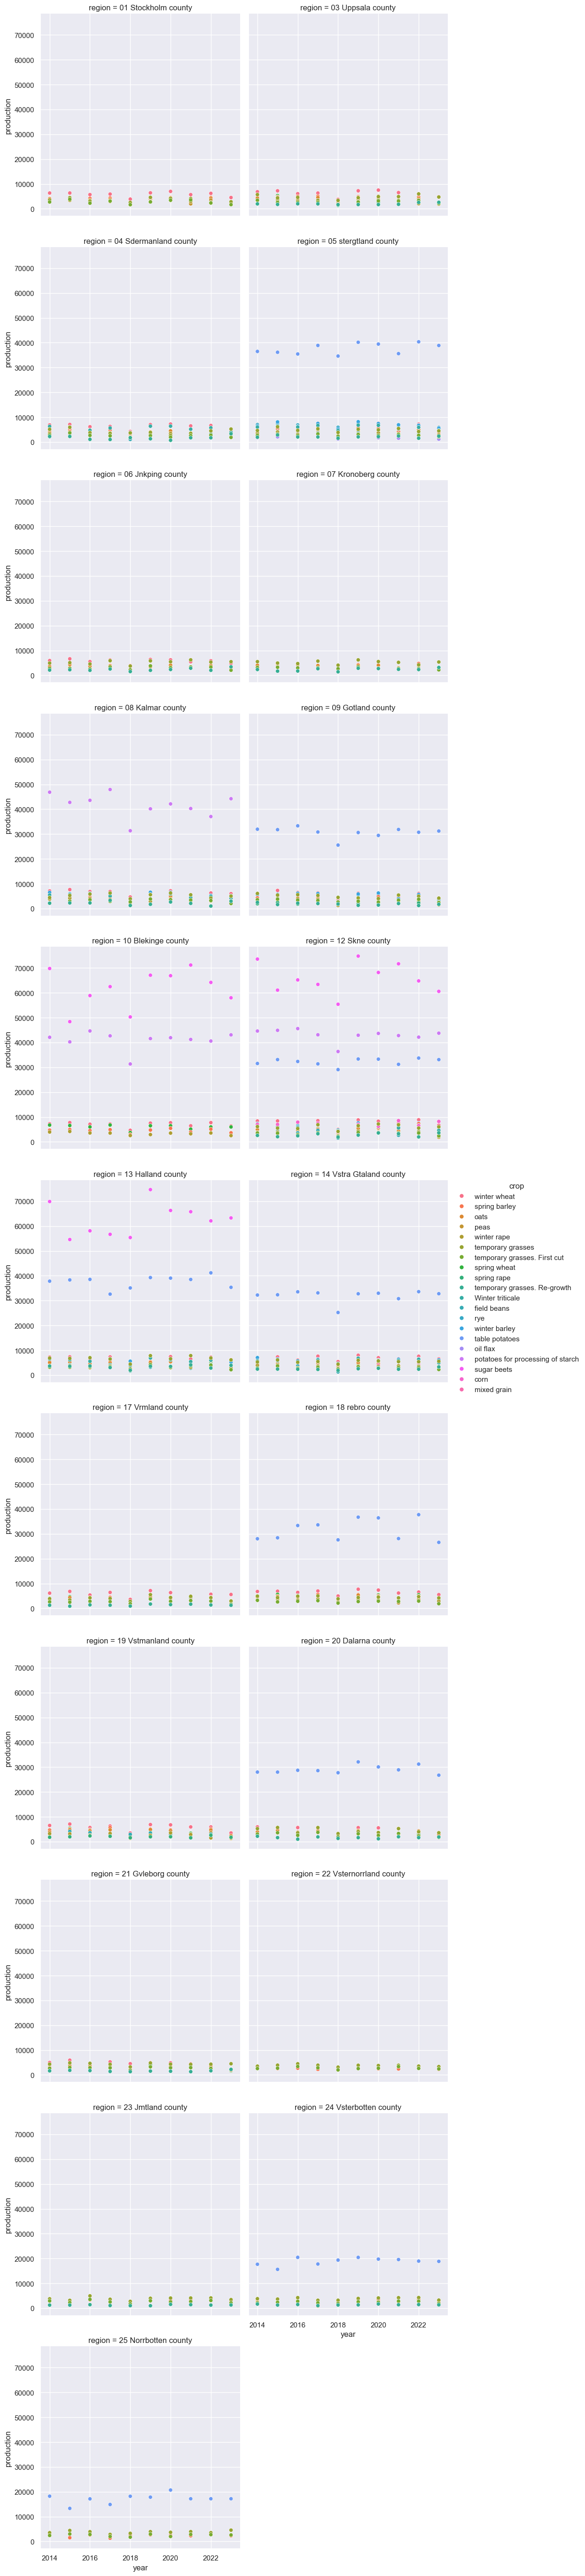

In [219]:
sns.relplot(data= df_long, x='year',y='production', 
            hue= 'crop',col='region',
            col_wrap=2,
           );
plt.show()

As a multiple regions with multiple categories crop, 

- - - 
## Plotting categorical data

Columns like "species" or "sex" represent _categorical_ variables. We've used them in the plots above before, but let's look at some plot types specifically made for categorical data.


#### Useful References

+ ["Plotting with Pandas and Seaborn" in Python for Data Analysis](https://wesmckinney.com/book/plotting-and-visualization.html#vis_pandas)
+ ["Plotting with categorical data" in the Seaborn tutorial](https://seaborn.pydata.org/tutorial/categorical.html)

We've previously looked at _histograms_ to see, e.g., the distribution of _bill length_ by _species_. We did this by distinguishing the different _species_ by color in a single histogram. We can also do that with a categorical scatter plot and/or box plot.

**12. Make a _categorical scatter plot_ that uses year as the categorical variable, and region as the numeric variable.** If you haven't plotted the same relationship as a histogram already (in Q6), do this too, and compare this scatter plot and the histogram. Can you see that they visualize the same information? Which one do you find more useful here?

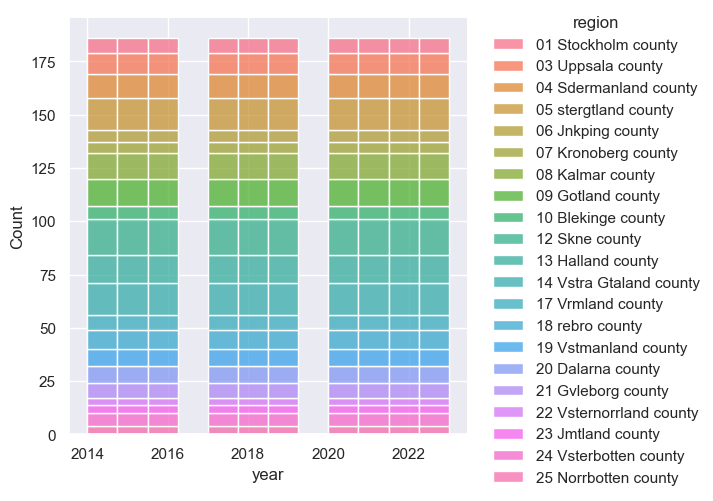

In [220]:
sns.displot(data=df_long, x='year',hue='region',multiple='stack');
plt.show()

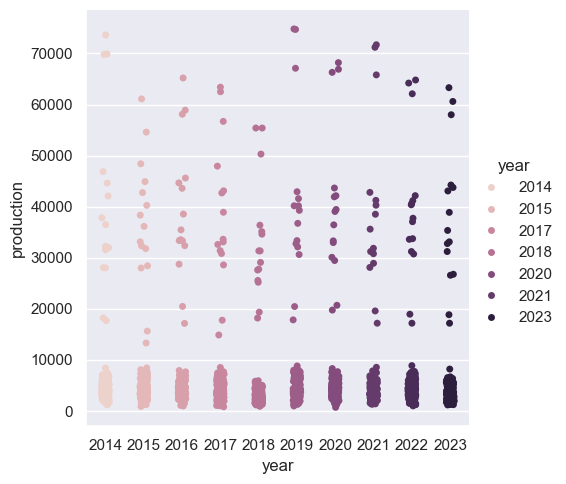

In [225]:
sns.catplot(data=df_long, x='year',y='production', hue='year');
plt.show()

**13. Make a _box plot_ analogous to Q12, i.e., using year as the categorical variable, and production as the numeric variable.** Do you know how to interpret the resulting plot? What do the boxes and lines mean?

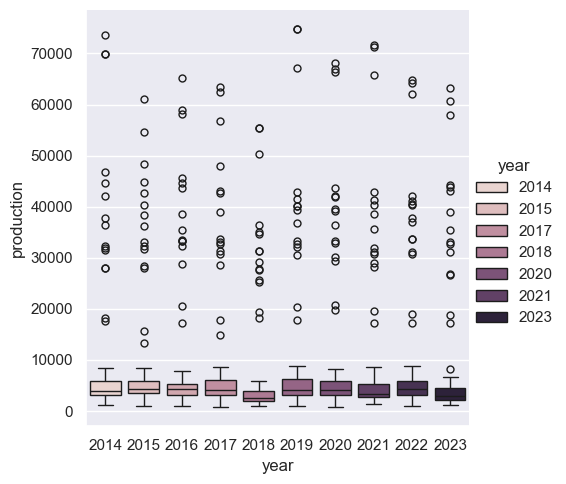

In [227]:
sns.catplot(data=df_long, x='year',y='production',hue='year',kind='box');
plt.show()

**14. Make a _bar plot_ showing the count of crops, conditioned on region** (_Hint:_ Seaborn calls this a "count plot".)

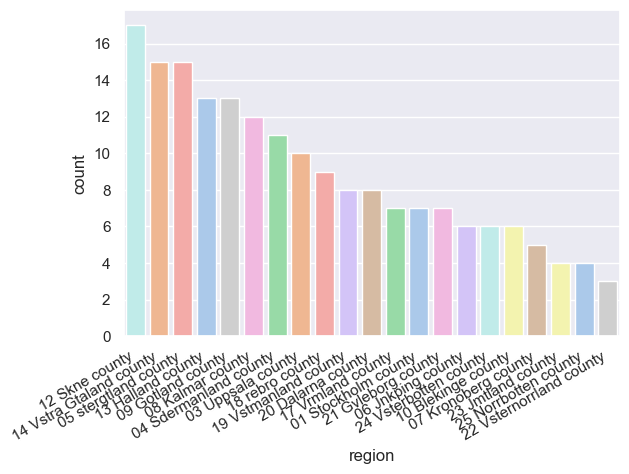

In [234]:
df_unique_crops = df.drop_duplicates(subset=["region", "crop"])
g= sns.countplot(
    data=df_unique_crops,
    x="region",
    order=df_unique_crops["region"].value_counts().index ,
    hue = "region",
    palette='pastel'
);
g.figure.autofmt_xdate();
plt.show()

Here we count the crop categories are cultivated in each county, and show them in order. 
12 Skne county has the highest diversity of 17 crop types, while 22 Vsternorrland county shows the lowest variety with only 3 types.

- - -
## Plotting time series data


For this task, we choose one crop-- winter wheat as a wheat_data set

In [235]:
wheat_data = df_long[df_long["crop"] == "winter wheat"]
wheat_data

region          crop  year  production
0       01 Stockholm county  winter wheat  2014      6340.0
7         03 Uppsala county  winter wheat  2014      6860.0
17    04 Sdermanland county  winter wheat  2014      6890.0
28     05 stergtland county  winter wheat  2014      7100.0
43        06 Jnkping county  winter wheat  2014      5930.0
...                     ...           ...   ...         ...
1804      17 Vrmland county  winter wheat  2023      5600.0
1811        18 rebro county  winter wheat  2023      5540.0
1820   19 Vstmanland county  winter wheat  2023      3510.0
1828      20 Dalarna county  winter wheat  2023      2430.0
1836     21 Gvleborg county  winter wheat  2023      1750.0

[160 rows x 4 columns]

**15. Make a _line plot_ showing the relationship between year and production.**

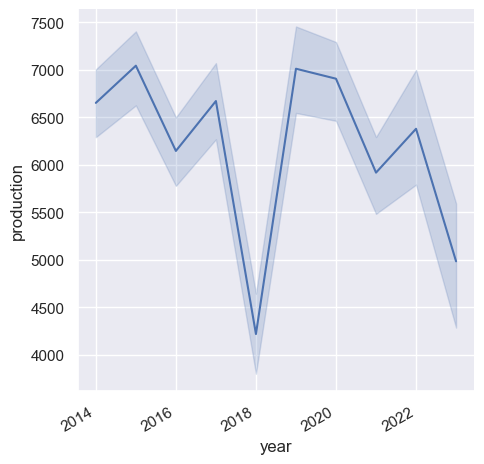

In [238]:
g= sns.relplot (data= wheat_data, x='year', y='production', kind='line');
g.figure.autofmt_xdate();
plt.show()


**16. Make a _line plot_ showing the relationship between year and three crops (winter wheat, spring barley, and oats) as separate lines in different colors.**


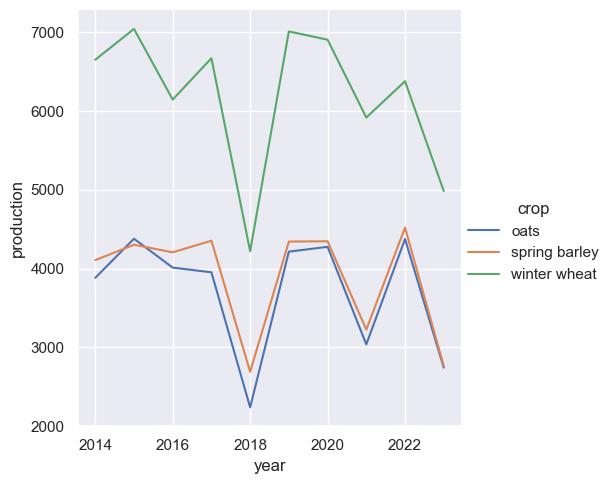

In [241]:
selected_crops = ["winter wheat", "spring barley", "oats"]
df_selected = df_long[df_long["crop"].isin(selected_crops)]

df_avg = df_selected.groupby(["crop", "year"]).production.mean().reset_index()

sns.relplot (data= df_avg, x='year', y= 'production', hue='crop',kind='line');
plt.show()

- - -
# Tasks based on Exercise 3: Making High-Quality Seaborn Visualizations

This contains more exercises on data visualization using the Seaborn library. In particular, we'll focus on making _high-quality plots_ that involve tweaking and customizing certain aspects of the plot styling. We'll also revisit some basic functionality of the Seaborn library.


## Controlling figure aesthetics (on a line plot)


The preprocessed yield data from the Assignment 1 is used for the exercises

In [203]:
df = pd.read_csv("preprocessed_yield_data.csv")
df.head()

region           crop    2014    2015    2016    2017    2018  \
0  01 Stockholm county   winter wheat  6340.0  6350.0  5710.0  5920.0  3890.0   
1  01 Stockholm county  spring barley  4180.0  4140.0  4190.0  4330.0  2250.0   
2  01 Stockholm county           oats  3980.0  3620.0  2900.0  3780.0  1550.0   
3  01 Stockholm county           peas  3230.0  3400.0  3490.0  2900.0  1590.0   
4  01 Stockholm county    winter rape  3050.0  3420.0  3050.0  3140.0  1740.0   

     2019    2020    2021    2022    2023  mean_production  
0  6420.0  7010.0  5700.0  6210.0  4530.0           5808.0  
1  3630.0  4570.0  2540.0  4580.0  2070.0           3648.0  
2  3820.0  4420.0  2710.0  4250.0  2500.0           3353.0  
3  3060.0  3340.0  1990.0  3510.0  1790.0           2830.0  
4  3020.0  3480.0  2930.0  2350.0  1790.0           2797.0

Our plan is to plot the production values of crops for each year. However, the years are features values now. Inorder to illustrate plots in a better and meaningful way, we are reshaping the DataFrame from wide to long format, converting year columns (2014–2023) into a single "year" column with corresponding "production" values.
After that, the "year" column is converted to integers for easier plotting and analysis.

In [170]:
years = [str(year) for year in range(2014, 2024)]
df_long = df.melt(
        id_vars=['region', 'crop', 'mean_production'],
        value_vars=years,
        var_name='year',
        value_name='production'
    )
df_long['year'] = df_long['year'].astype(int)


In [171]:
df_long.head()

region           crop  mean_production  year  production
0  01 Stockholm county   winter wheat           5808.0  2014      6340.0
1  01 Stockholm county  spring barley           3648.0  2014      4180.0
2  01 Stockholm county           oats           3353.0  2014      3980.0
3  01 Stockholm county           peas           2830.0  2014      3230.0
4  01 Stockholm county    winter rape           2797.0  2014      3050.0

The plot function is written inorder to call in the further exercises. The legend is adjusted to fit below the plot as there are too many crops and it was hindering the plot view. This way, the plot is neat and easily understandable

In [172]:
def plot_crop_production(**kwargs):
    g = sns.lineplot(data=df_long, **kwargs)
    g.figure.autofmt_xdate()
    g.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, title='Crop')
    return g
    

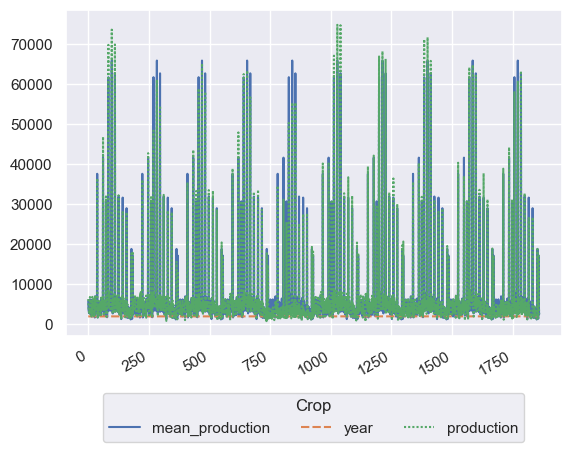

In [173]:
# Testing the function
plot_crop_production();
plt.show()

As the plot isn't very neat and easy to understand, we have decided to stick with just the years and crop production over the years for plotting. We will be displaying years along x axis and production along y axis. The hue is selected as crops so that plot for each crop can be distinguished using the corresponding colour.

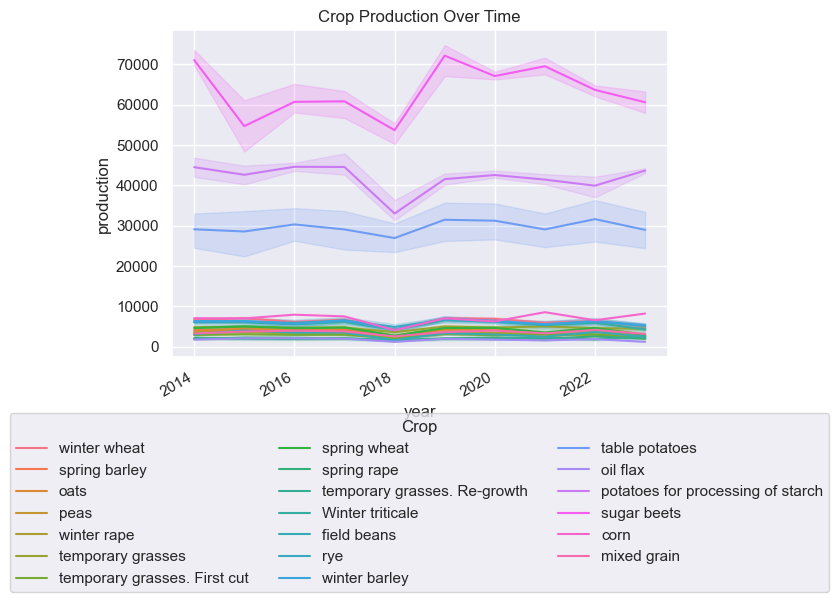

In [174]:
plot_crop_production(
    x='year',
    y='production',
    hue= 'crop',
);

plt.title('Crop Production Over Time')
plt.show()

**1. Change the plot style so that it has a white background with ticks on the axes, and no _spines (borders)_ on the top and right-hand side.**

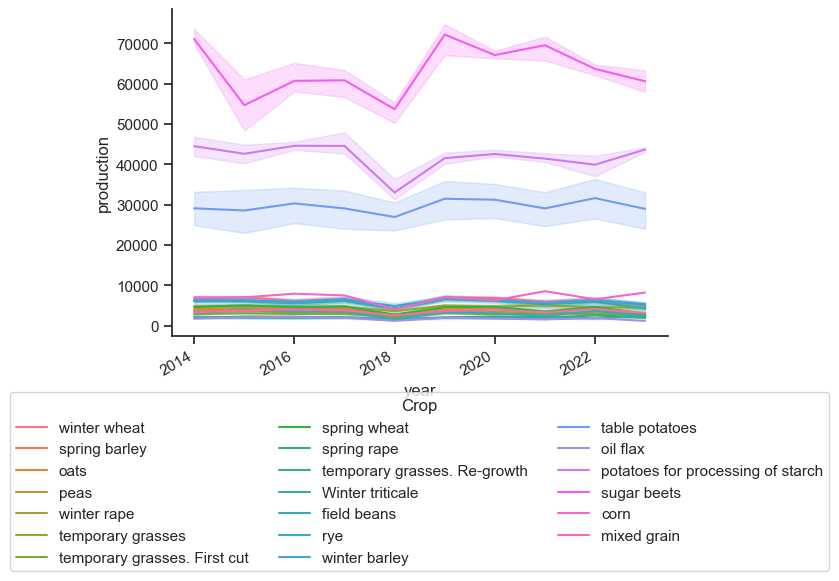

In [175]:
sns.set_style("ticks")
plot_crop_production(
    x='year',
    y='production',
    hue= 'crop',
);
sns.despine()
plt.show()

**2. Change the plot so that it is larger, and also has larger fonts and thicker lines.** Make sure that the legend doesn't cover up the lines of the plot, though.

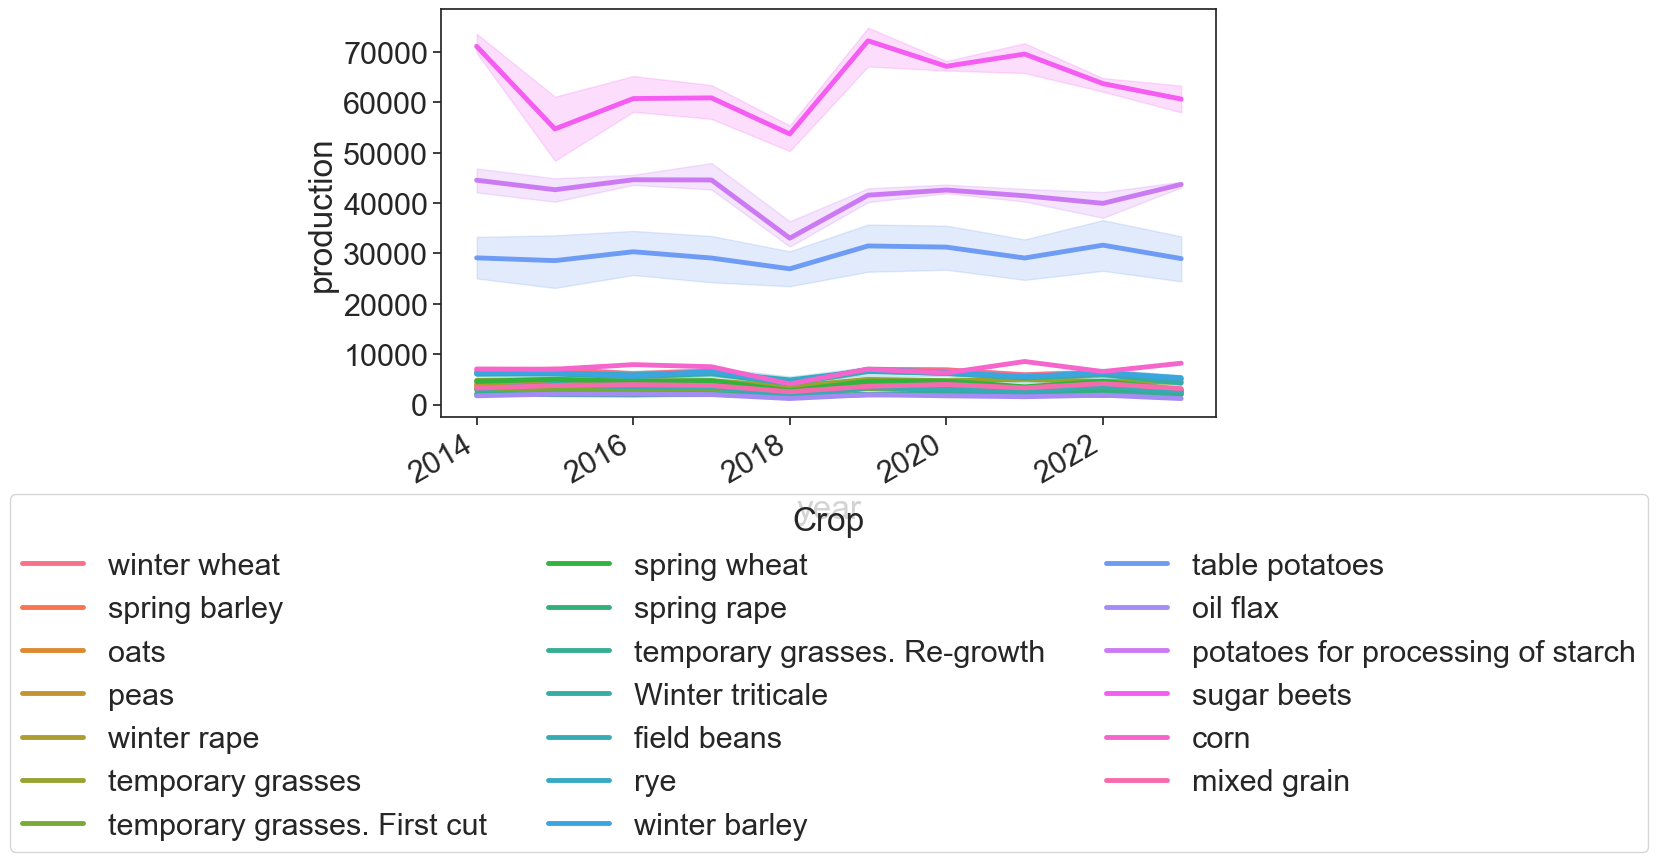

In [176]:
with sns.plotting_context("notebook", font_scale=2, rc={"lines.linewidth": 3.5}):
    plt.figure(figsize=(10,6))
    plot_crop_production(
        x='year',
        y='production',
        hue='crop',
    );
plt.show()

**3. Change the *y*-axis so that it has "major" ticks every 50 steps, and "minor" ticks every 10 steps.** Here, you need to use standard Matplotlib functions; Seaborn doesn't provide its own interface for that.

Here, the y axis values are limited to see the ticks better.

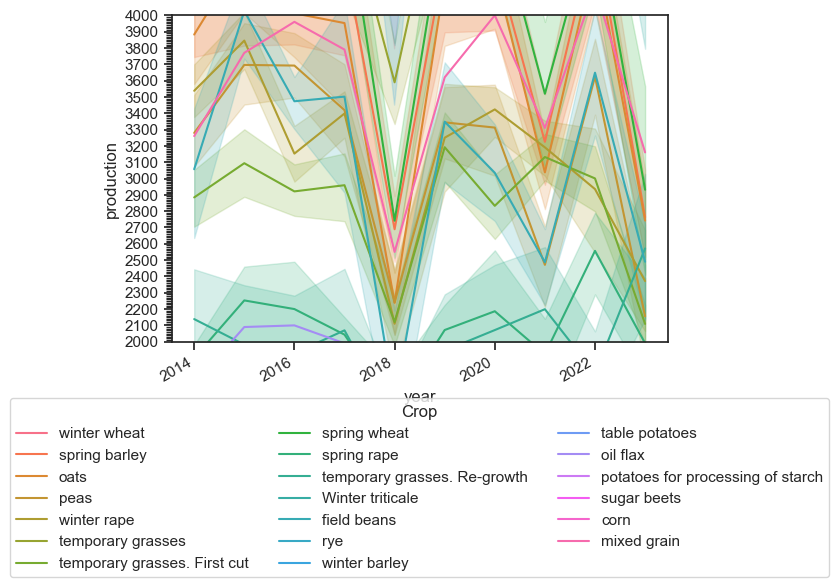

In [177]:
g = plot_crop_production(
        x='year',
        y='production',
        hue='crop',
    );
ax = g.figure.axes[0]  # Get the figure axes
ax.set_ylim(2000, 4000) # limiting the y axis values for a cleaner graph
# Alternative 1:
ax.yaxis.set_major_locator(plt.MultipleLocator(100))
ax.yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.show()

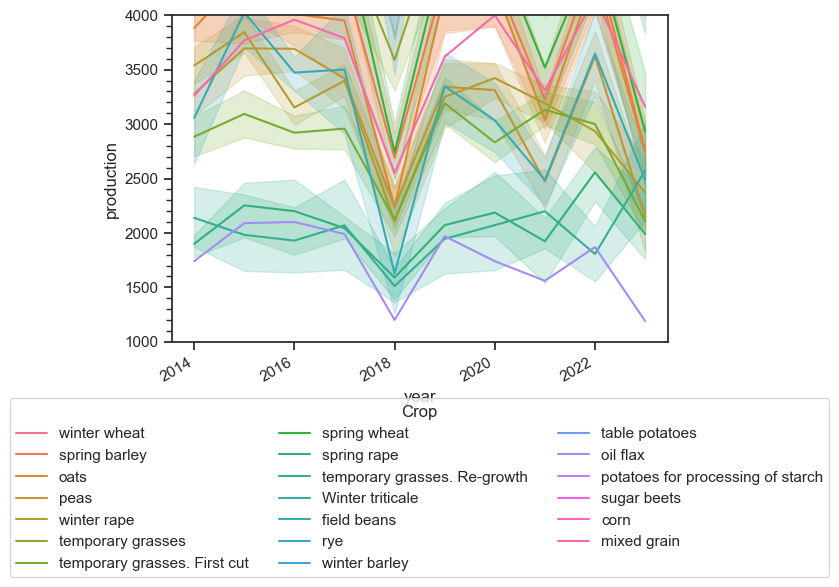

In [178]:
g = plot_crop_production(
        x='year',
        y='production',
        hue='crop',
    );
ax = g.figure.axes[0]  # Get the figure axes
ax.set_ylim(1000, 4000) # limiting the y axis values for a cleaner graph
# Alternative 2:
ax.set_yticks(list(range(1000,4001,500)))
ax.set_yticks(list(range(1000,4001,100)), minor=True);
plt.show()

**4. Turn off the "error band" plotting.** Seaborn gives us a lot of functionality out of the box; with this line plot, it automatically estimates confidence intervals and plots corresponding error bands around the lines.

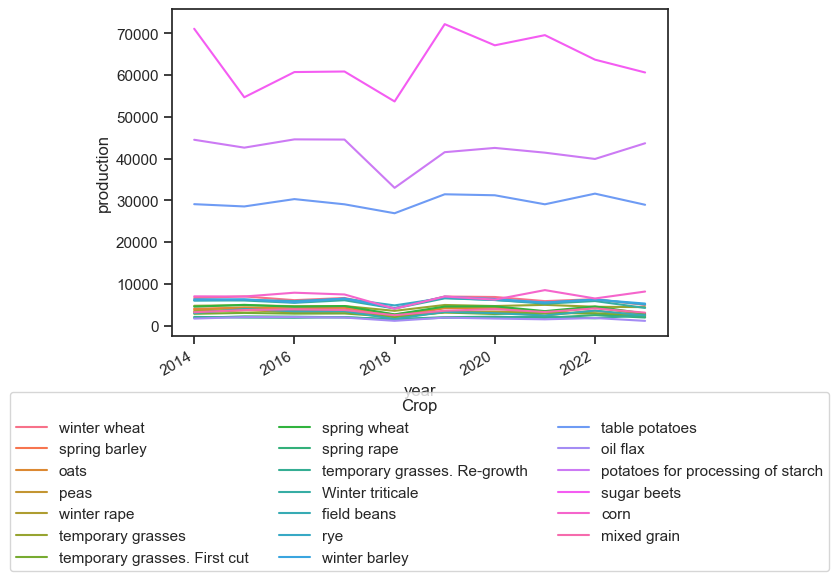

In [179]:
plot_crop_production(x='year',
        y='production',
        hue='crop',
        errorbar=None);  # cis function was not used as it was shown as depricated
plt.show()

 **5. Plot _markers_ for each data point and make all lines solid.** By default, Seaborn gives each line a different style (e.g., solid, dashed, dotted). This is good! Not relying on color alone to convey information is good practice for accessibility, as it may be hard to distinguish the colors in some situations (e.g., for colorblind people, or when printing on a black-and-white printer).

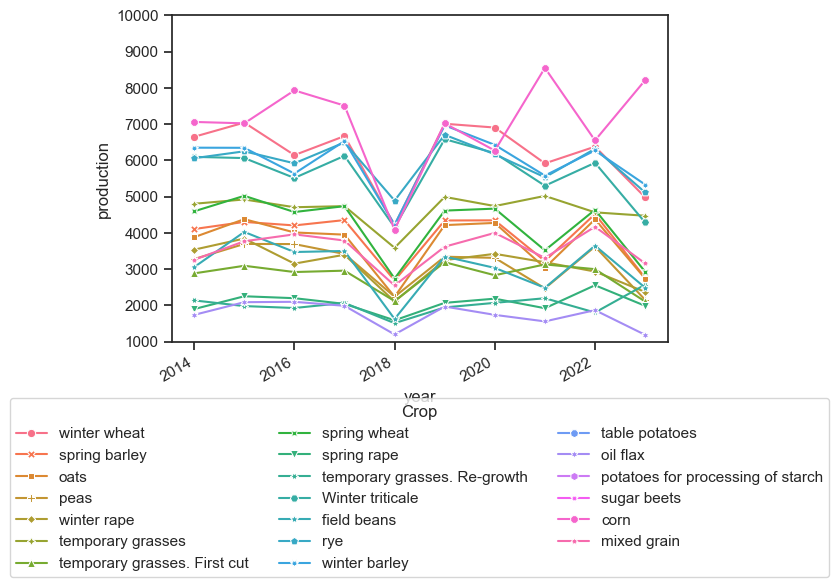

In [180]:
g=plot_crop_production(x='year',
        y='production',
        hue='crop',style = 'crop', errorbar=None, markers=True, dashes=False);
ax = g.figure.axes[0]
ax.set_ylim(1000, 10000 )# limiting the y axis values for a cleaner graph
plt.show()

- - -
## Controlling figure aesthetics (on categorical plots & facet grids)

**7. Turn the scatter plot above into a _FacetGrid_ of six scatter plots that distinguish by region.**

Here, we start by creating a Seaborn scatter plot of production by year for each crop using a pastel color palette and a full legend.
It adds minor ticks every 100 units on both axes, customizes axis labels, and moves the legend outside the plot to the upper left for better readability, before displaying the plot.


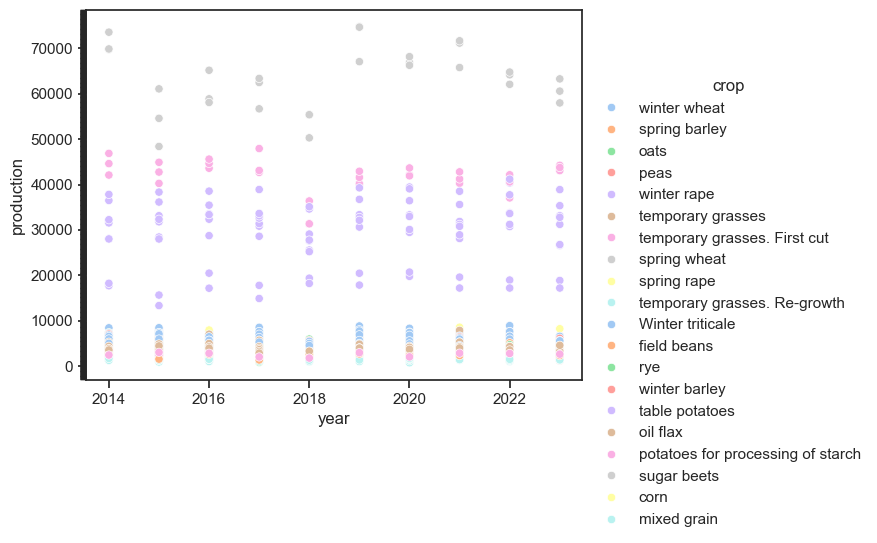

In [181]:
# Set the style
sns.set_style("ticks")
# Make the scatter plot
ax = sns.scatterplot(
    data=df_long,
    x='year',
    y='production',
    hue='crop',
    palette="pastel",  # sets the color palette
    legend="full",  # this makes all 8 values show up in the legend
)
# Set the minor ticks to every 100 points
ax.xaxis.set_minor_locator(plt.MultipleLocator(100))
ax.yaxis.set_minor_locator(plt.MultipleLocator(100))
# Set the axis labels
ax.set_xlabel("year")
ax.set_ylabel("production")

sns.move_legend(
    ax,
    "upper left",
    bbox_to_anchor=(1, 0.85),
    frameon=False,
)
plt.show()

Now we are creating a faceted scatter plot (relplot) showing production by year for each crop, with separate subplots for each region arranged in rows of 3.
It uses a pastel color palette, sets axis labels, customizes subplot titles to show the region name, and displays a full legend for all crops.

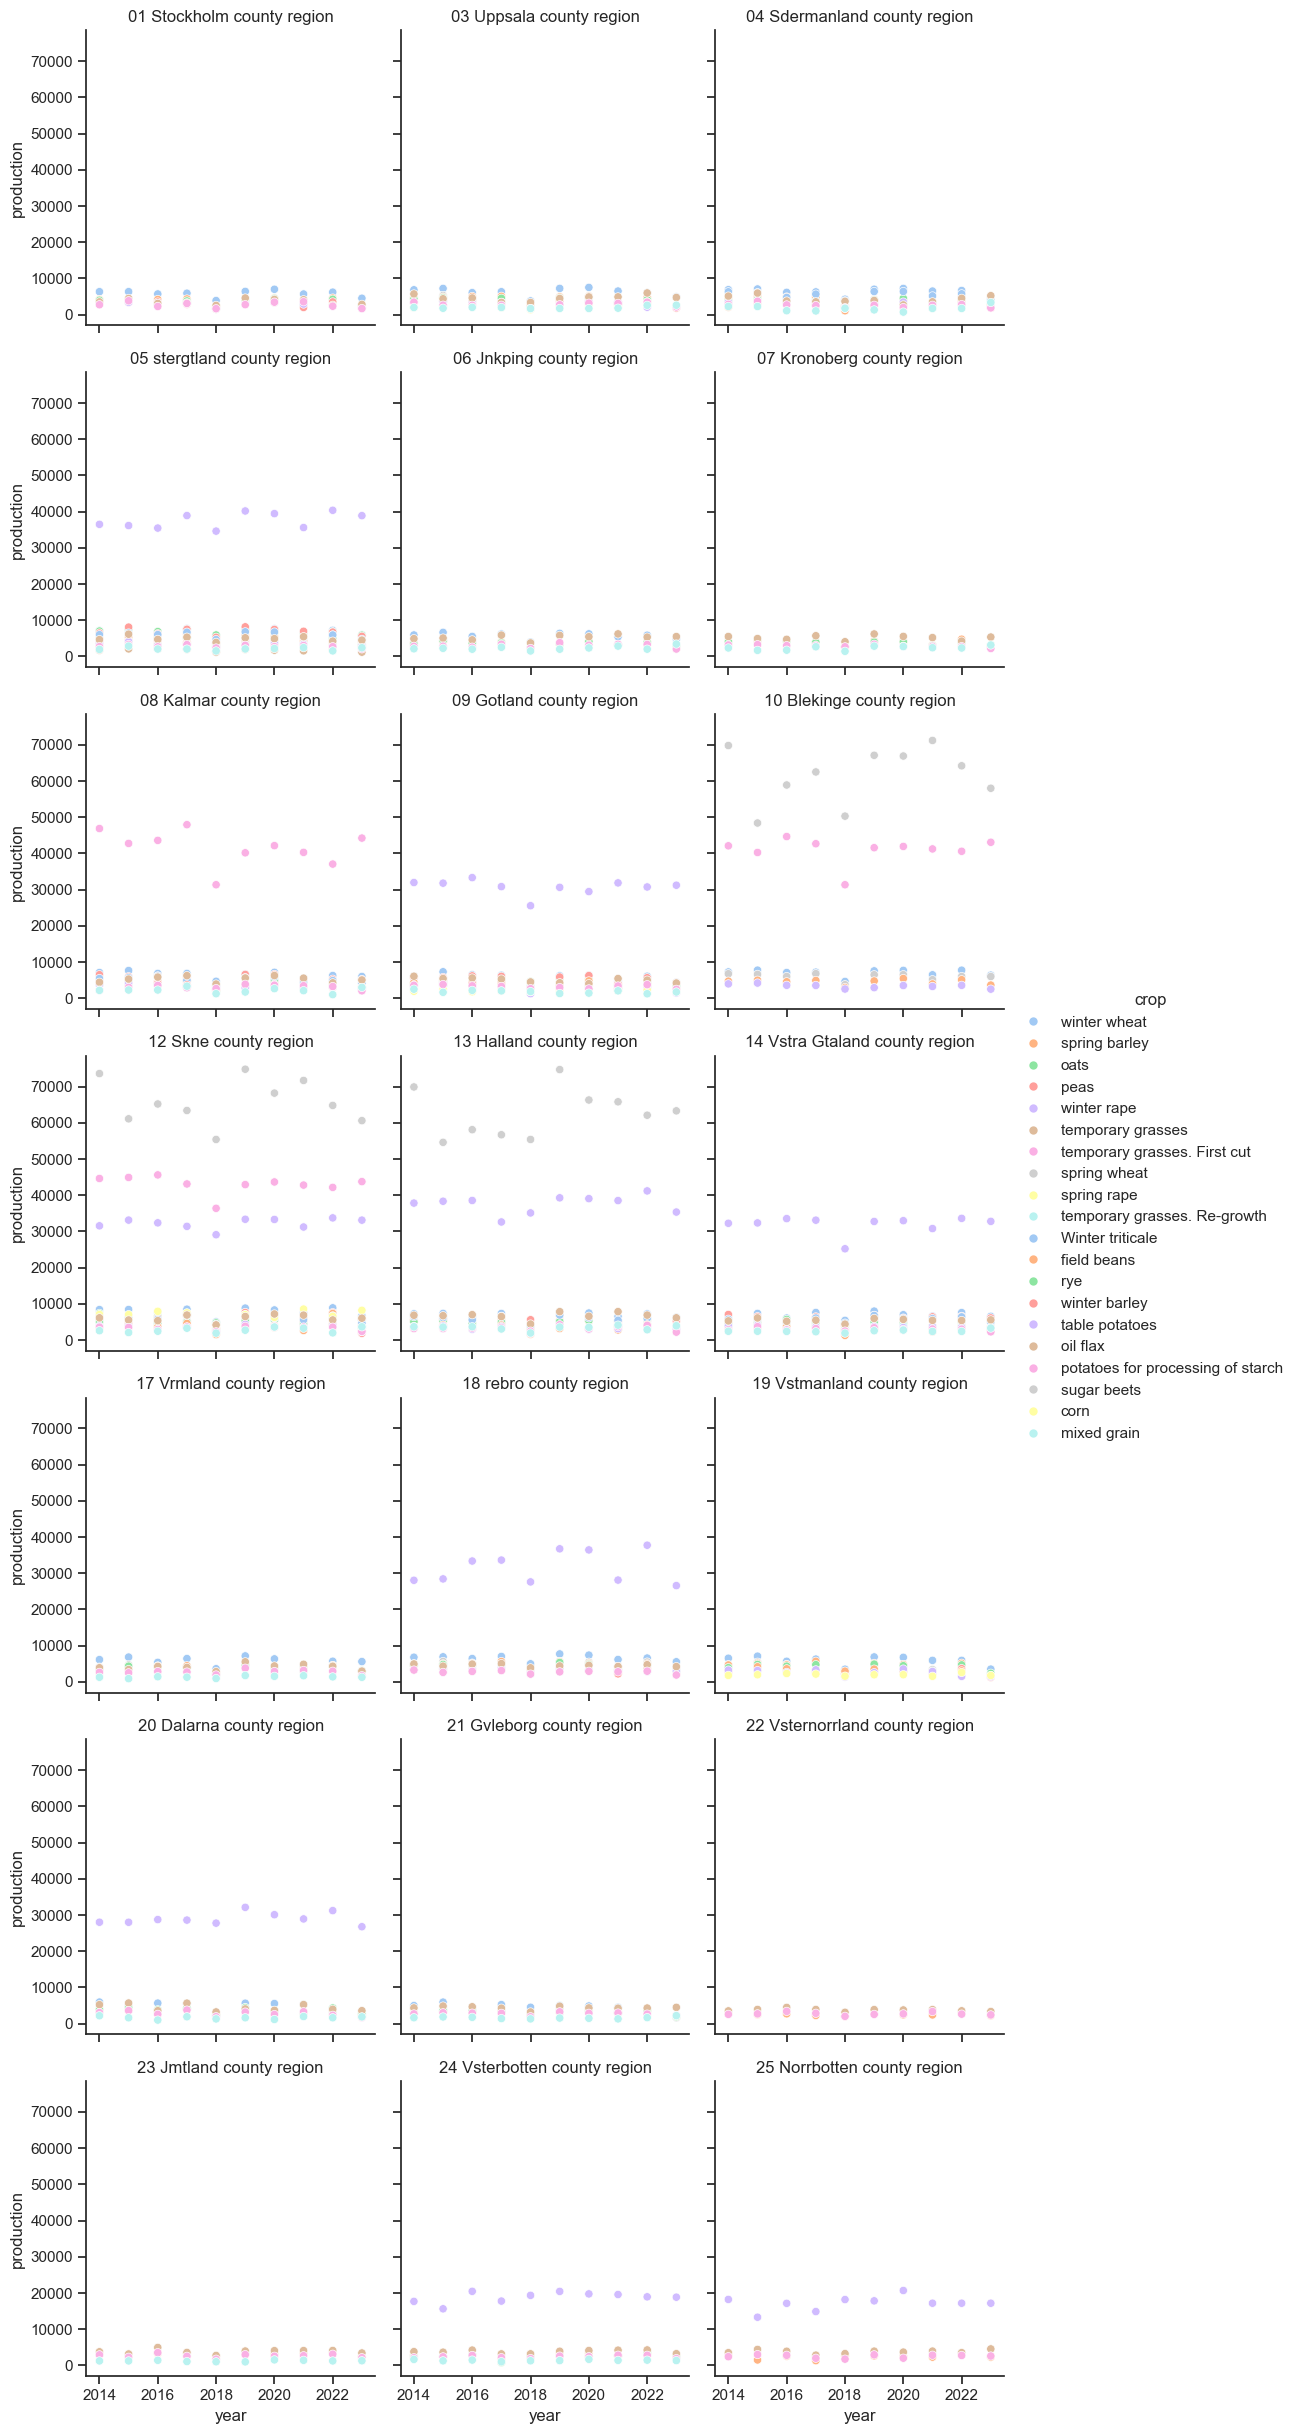

In [182]:
facet = sns.relplot(
    data=df_long,
    x="year",
    y="production",
    hue="crop",
    col="region",
    col_wrap=3,
    palette="pastel",
    legend="full",
    height=3.5,
)
facet.set_axis_labels("year", "production")
facet.set_titles(col_template="{col_name} region");
plt.show()

Now we are assigning a unique pastel color to each year by creating a custom color dictionary, then plots a stripplot of production by year with each year shown in its own color.
It uses hue="year" to color the points, includes a legend titled "Year," and displays the plot.

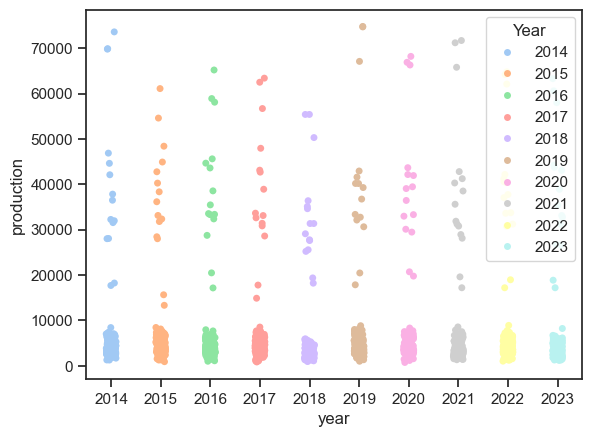

In [183]:
years = sorted(df_long['year'].unique())
palette = sns.color_palette("pastel", n_colors=len(years))
year_color_dict = dict(zip(years, palette))

sns.stripplot(
    data=df_long,
    x="year",
    y="production",
    hue="year",                
    palette=year_color_dict,
    dodge=False               
)
plt.legend(title="Year")
plt.show()

**8. Pick individual colors for different years** 

Modify the code so that you define individual colors for each year. (You can pick whatever colors you think look best, but one suggestion is to simply take Seaborn's default color palette, and pick individual colors from there.)

In [184]:
# There are many ways to pick your colors, but let's use the default Seaborn palette
# and pick appropriate colors from it for each attribute value.
pal = sns.color_palette()
pal

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

C:\Users\USER\AppData\Local\Temp\ipykernel_4220\1752905440.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


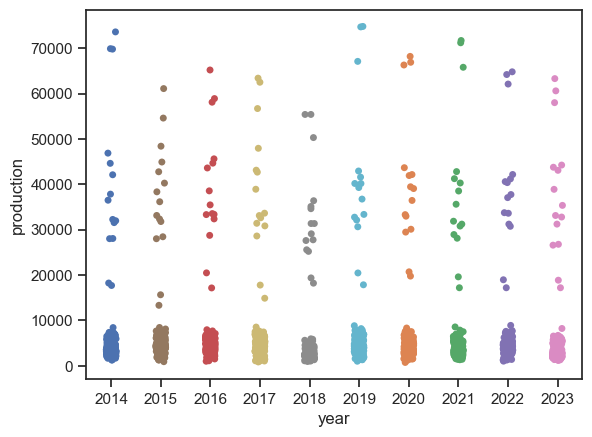

In [185]:
sns.stripplot(
    data=df_long,
    x="year",
    y="production",
    palette={
        "2014": pal[0],  # blue
        "2015": pal[5],  # brown
        "2016": pal[3],  # red
        "2017": pal[-2],  # yellow
        "2018": pal[-3],  # gray
        "2019": pal[-1],  # light blue
        "2020": pal[1], # orange
        "2021": pal[2], # green
        "2022": pal[4], # purple
        "2023": pal[-4], # pink
    },
);
plt.show()

- - -
# Tasks based on Exercise 9 
The tasks that can be done in Python and not overlapping with Exercise 3 are done here. 

**This section contains more exercises on data visualization, focusing on tweaking and customizing plots, as well as more advanced scenarios that require the combination of data manipulation and plotting.**

  ### Customizing plots
**1. Show the “Level” variable in color and make the points slightly larger**

This task generates a scatter plot comparing crop yields from 2014 (X-axis) and 2015 (Y-axis), with each point representing a crop. The color and size of the points reflect the crop's mean production, using the colorblind-friendly `viridis` palette for clarity and visual appeal.


                region           crop    2014    2015    2016    2017    2018  \
0  01 Stockholm county   winter wheat  6340.0  6350.0  5710.0  5920.0  3890.0   
1  01 Stockholm county  spring barley  4180.0  4140.0  4190.0  4330.0  2250.0   
2  01 Stockholm county           oats  3980.0  3620.0  2900.0  3780.0  1550.0   
3  01 Stockholm county           peas  3230.0  3400.0  3490.0  2900.0  1590.0   
4  01 Stockholm county    winter rape  3050.0  3420.0  3050.0  3140.0  1740.0   

     2019    2020    2021    2022    2023  mean_production  
0  6420.0  7010.0  5700.0  6210.0  4530.0           5808.0  
1  3630.0  4570.0  2540.0  4580.0  2070.0           3648.0  
2  3820.0  4420.0  2710.0  4250.0  2500.0           3353.0  
3  3060.0  3340.0  1990.0  3510.0  1790.0           2830.0  
4  3020.0  3480.0  2930.0  2350.0  1790.0           2797.0  
Index(['region', 'crop', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023', 'mean_production'],
      dtype='ob

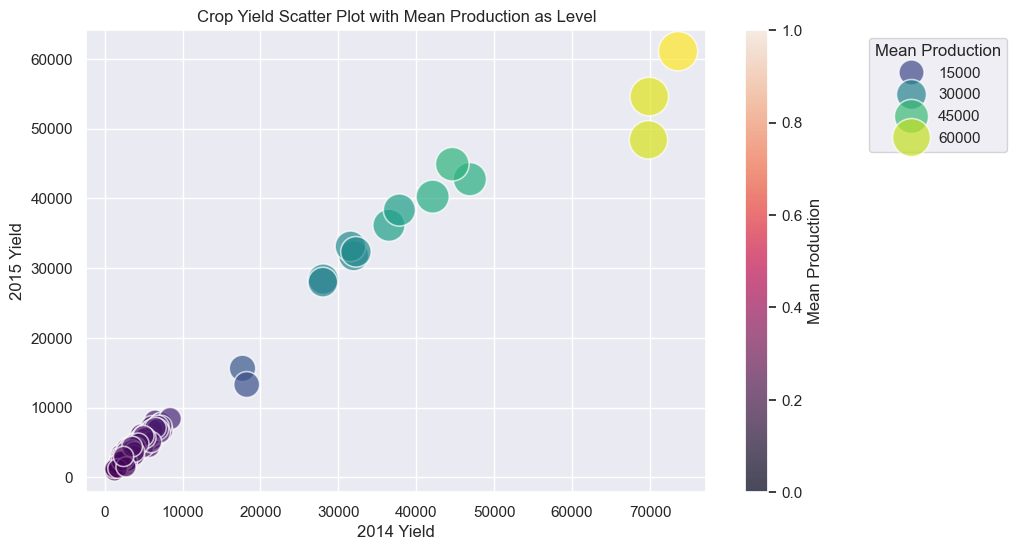

In [243]:
# Load your data (make sure the path is correct)
data = pd.read_csv('preprocessed_yield_data.csv')
# Check the structure of the DataFrame
print(data.head())
print(data.columns)

# Ensure the relevant columns are numeric
data['2014'] = pd.to_numeric(data['2014'], errors='coerce')
data['2015'] = pd.to_numeric(data['2015'], errors='coerce')
data['mean_production'] = pd.to_numeric(data['mean_production'], errors='coerce')

# Create a scatter plot using mean production as the level
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=data, x='2014', y='2015', 
                          hue='mean_production', 
                          size='mean_production', 
                          sizes=(200, 800), 
                          alpha=0.7, 
                          palette='viridis')

# Customize the plot
plt.title('Crop Yield Scatter Plot with Mean Production as Level')
plt.xlabel('2014 Yield')
plt.ylabel('2015 Yield')
plt.colorbar(scatter.collections[0], label='Mean Production')  # Add color bar to indicate mean production levels
plt.legend(title='Mean Production', bbox_to_anchor=(1.25, 1), loc='upper left')

# Show the plot
plt.show()


The scatter plot illustrates the link between 2014 and 2015 crop yields, with larger, more vibrant points indicating higher average production. A color bar and legend aid interpretation, making it easy to spot trends and outliers.


**2.  Add labels to the plot & the axes**

Add a title, subtitle, caption, and customize the labels for the x and y axes as well as the color scale.This task creates an improved scatter plot of 2014 vs. 2015 crop yields using Seaborn. It uses a blue color scale and point sizes to show mean production, with clear titles, labels, and a color bar for easy interpretation of high-yield crops.


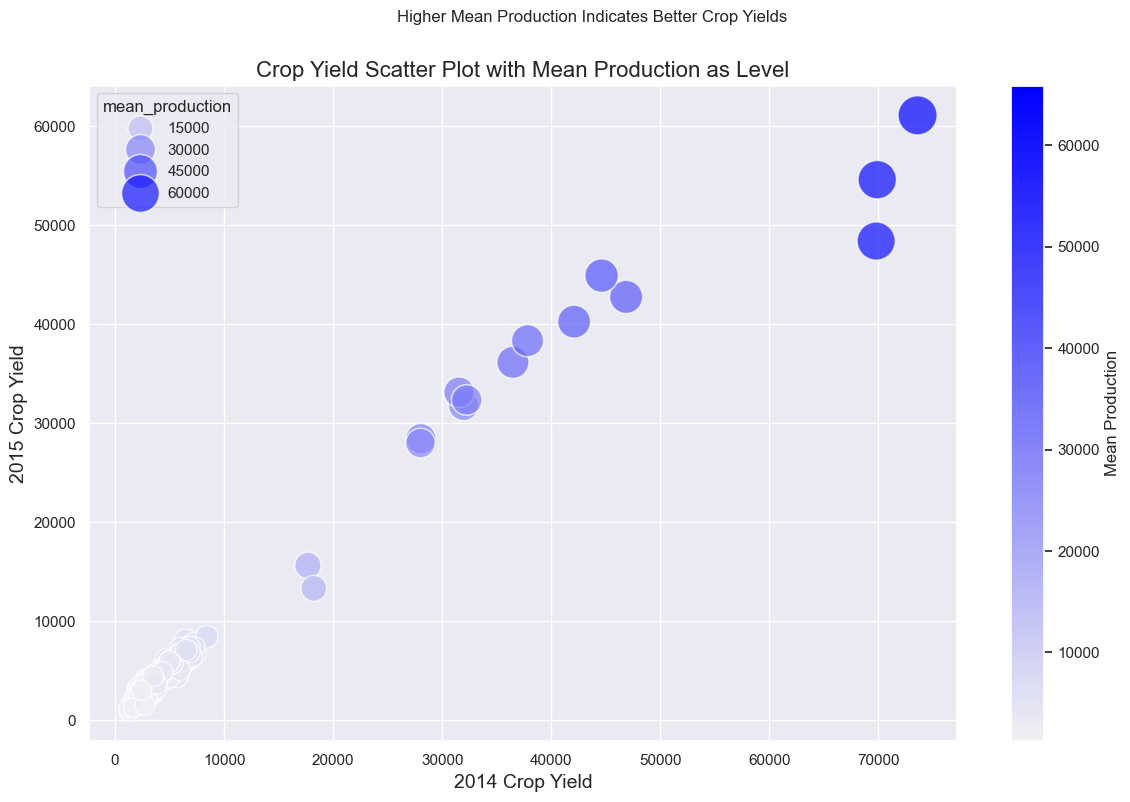

In [244]:
import matplotlib as mpl
# Ensure the relevant columns are numeric
data['2014'] = pd.to_numeric(data['2014'], errors='coerce')
data['2015'] = pd.to_numeric(data['2015'], errors='coerce')
data['mean_production'] = pd.to_numeric(data['mean_production'], errors='coerce')
# Create a blue color palette
blue_palette = sns.light_palette("blue", as_cmap=True)
# Create a scatter plot using mean production as the level
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=data, x='2014', y='2015', 
                          hue='mean_production', 
                          size='mean_production', 
                          sizes=(200, 800), 
                          alpha=0.7, 
                          palette=blue_palette)

# Customize the plot with labels and titles
plt.title('Crop Yield Scatter Plot with Mean Production as Level', fontsize=16)
plt.suptitle('Higher Mean Production Indicates Better Crop Yields', fontsize=12, y=1)
plt.xlabel('2014 Crop Yield', fontsize=14)
plt.ylabel('2015 Crop Yield', fontsize=14)
# Normalize mean_production values for the color map
norm = mpl.colors.Normalize(vmin=data['mean_production'].min(), vmax=df['mean_production'].max())
# Use 'Blues' colormap for blue shades
sm = plt.cm.ScalarMappable(cmap= blue_palette, norm=norm)
sm.set_array([])  # Needed for some matplotlib versions
# Create the color bar with label
cbar = plt.colorbar(sm, ax=scatter.axes, label='Mean Production')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the caption
plt.show()


The plot shows the link between 2014 and 2015 crop yields, with point size and blue color intensity showing mean production. A clear color bar and tidy layout make the chart easy to read and visually attractive.


**3. Modify both x and y axis and have major ticks (with labels) every 500 points, and minor ticks (without labels) every 100 points.**

This task creates a horizontal scatter plot showing crops with mean production of 3000 or more. Crop names are on the Y-axis, production on the X-axis, and both color and size highlight production levels using a blue color scale. X-axis ticks are adjusted for clarity.



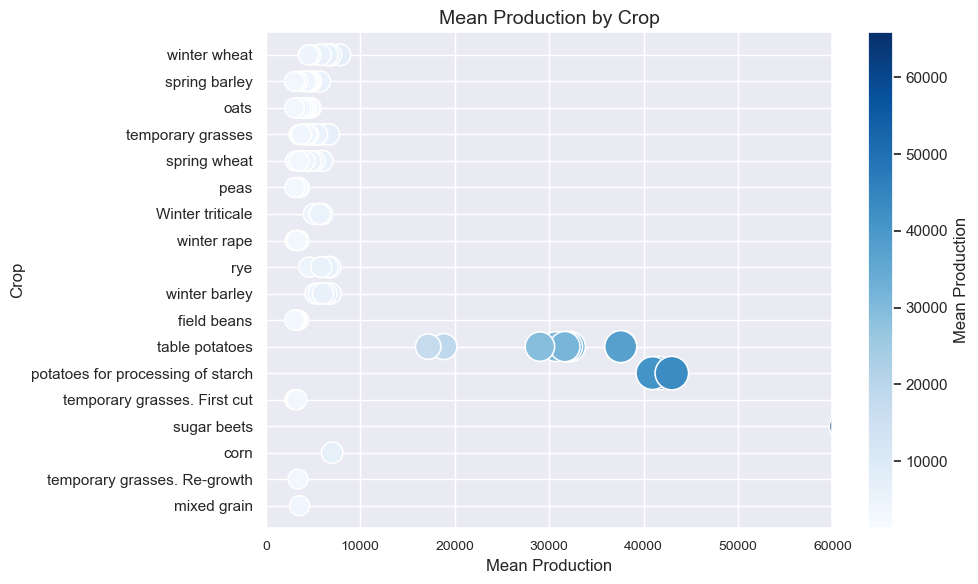

In [245]:
import matplotlib.ticker as ticker
import matplotlib as mpl

# Filter data to mean_production ≤ 3000 for display
filtered_df = df[df["mean_production"] >= 3000]

# Set up color normalization and colormap
norm = mpl.colors.Normalize(vmin=df['mean_production'].min(), vmax=df['mean_production'].max())
blue_palette = plt.cm.Blues  # Use 'Blues' colormap

# Plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=filtered_df,
    x="mean_production",
    y="crop",
    hue="mean_production",
    size='mean_production', 
    sizes=(200, 800), 
    palette=blue_palette,
    hue_norm=norm,
    legend=False  # Hide seaborn's default legend
)

# Set x-axis range and ticks
plt.xlim(0,60000)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10000))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.tick_params(axis='x', which='major', labelsize=10)
ax.tick_params(axis='x', which='minor', length=4)

# Add colorbar for mean_production
sm = plt.cm.ScalarMappable(cmap=blue_palette, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label='Mean Production')

# Labels and title
plt.title("Mean Production by Crop", fontsize=14)
plt.xlabel("Mean Production")
plt.ylabel("Crop")

# Show plot
plt.tight_layout()
plt.show()


**4. Modify the color scale to use something and to have darker shades the higher the level is!**

This scatter plot compares crop yields from 2014 (X-axis) and 2015 (Y-axis). Each point represents a crop, colored by its average production—lighter green for lower and darker green for higher production. All points are the same size for clarity, and a color bar shows how colors relate to production levels. The plot highlights changes in yield between the two years.



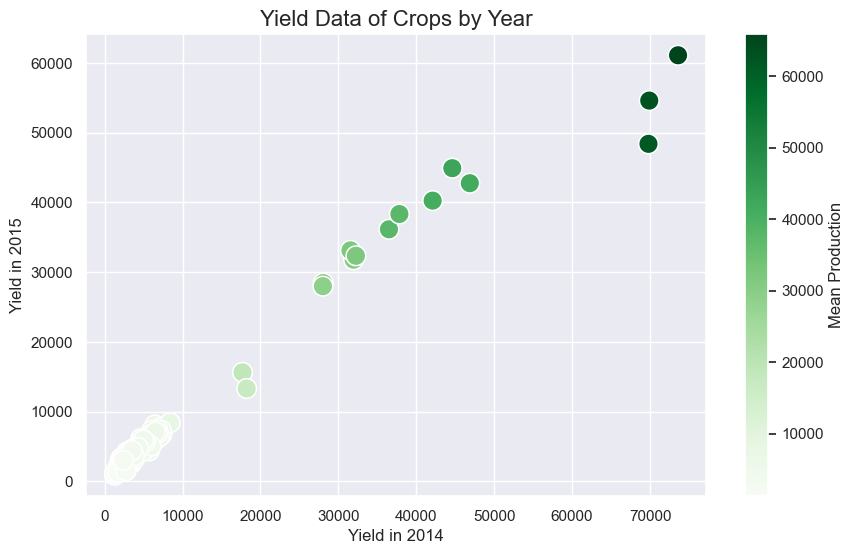

In [246]:
import matplotlib as mpl
# Create a scatter plot
def my_plot(df):
    plt.figure(figsize=(10, 6))
    
    # Create a scatter plot with a greenish color palette
    scatter = sns.scatterplot(data=df, x='2014', y='2015', hue='mean_production', 
                              palette='Greens', size=100, sizes=(200, 800), legend=None)
    
    # Customize the plot
    plt.title("Yield Data of Crops by Year", fontsize=16)
    plt.xlabel("Yield in 2014", fontsize=12)
    plt.ylabel("Yield in 2015", fontsize=12)
    
    # Create a color bar with the same greenish palette
    norm = mpl.colors.Normalize(vmin=df['mean_production'].min(), vmax=df['mean_production'].max())
    sm = plt.cm.ScalarMappable(cmap='Greens', norm=norm)
    sm.set_array([])  # Only needed for older versions of matplotlib
    
    # Create the color bar
    cbar = plt.colorbar(sm, ax=scatter.axes, label='Mean Production')
    

    plt.show()

# Call the function with the dataset
my_plot(data)


**5. Change the theme and the aspect ratio of the plot!**

Change the theme and the aspect ratio of the plot! Try out different options and pick something other than the default. Changing the theme to whitegrid must be done separately with the theme() function.

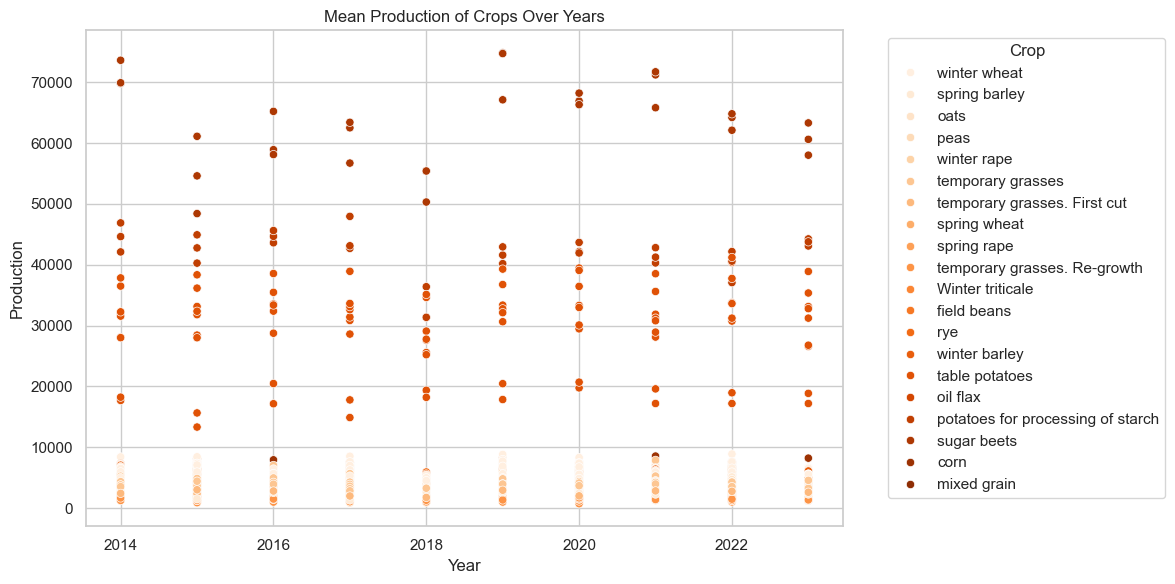

In [247]:
#  Reshape the DataFrame
# Melt the DataFrame to have 'year' and 'production' as separate columns
data_melted = pd.melt(data, id_vars=['region', 'crop'], 
                       value_vars=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
                       var_name='year', value_name='production')  # Changed 'mean_production' to 'production'

# Convert 'year' to numeric
data_melted['year'] = pd.to_numeric(data_melted['year'])

#  Create the Plot Function
def my_plot_themed():
    # Set the theme
    sns.set_theme(style="whitegrid")  # Change the theme to 'whitegrid'
    
    # Create the plot
    plt.figure(figsize=(12, 6))  # Set the aspect ratio to be wider
    plot = sns.scatterplot(data=data_melted, x='year', y='production', hue='crop', palette='Oranges')
    
    # Customize the plot
    plt.title('Mean Production of Crops Over Years')
    plt.xlabel('Year')
    plt.ylabel('Production')
    plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the Function
my_plot_themed()


The scatter plot has been refined for better readability, using the Oranges palette to distinguish crops, with improved spacing and gridlines. 

**6. Add annotations for selected data points and circle them to make them stand out!**

Task is to add text annotations to the plot next to the data points that correspond to the crop with the respective name. This plot shows mean production by region, with all data points visualized. The selected crop is highlighted by a red circle and labeled with an annotation to make it stand out clearly. This helps in easily identifying specific crops within the overall data.



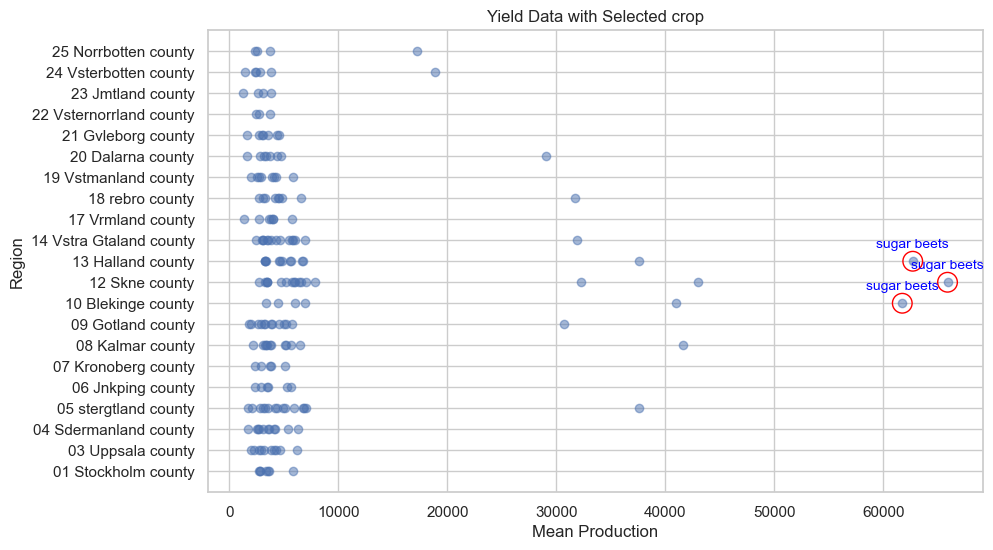

In [248]:
# Define the selected crop
names = ["sugar beets"]

# Filter the dataset for the selected names
crop_selected = data[data['crop'].isin(names)]

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(data['mean_production'], data['region'], alpha=0.5)

# Annotate and circle the selected data points
for index, row in crop_selected.iterrows():
    plt.scatter(row['mean_production'], row['region'], s=200, edgecolor='red', facecolor='none')  # Circle
    plt.annotate(row['crop'], 
                 (row['mean_production'], row['region']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', 
                 fontsize=10, 
                 color='blue')

# Set plot labels and title
plt.title('Yield Data with Selected crop')
plt.xlabel('Mean Production')
plt.ylabel('Region')
plt.show()


The plot shows mean production across regions, with "sugar beets" highlighted in a red circle and labeled for easy identification.


**7.Make the legend for “Level” appear with discrete values instead of a gradient!**

At present, the legend for the "Level" variable should be displayed as a color gradient on the right side of the plot. In this Seaborn visualization, the distinct levels (ranging from 1 to 8) appeared as separate, individual points. 


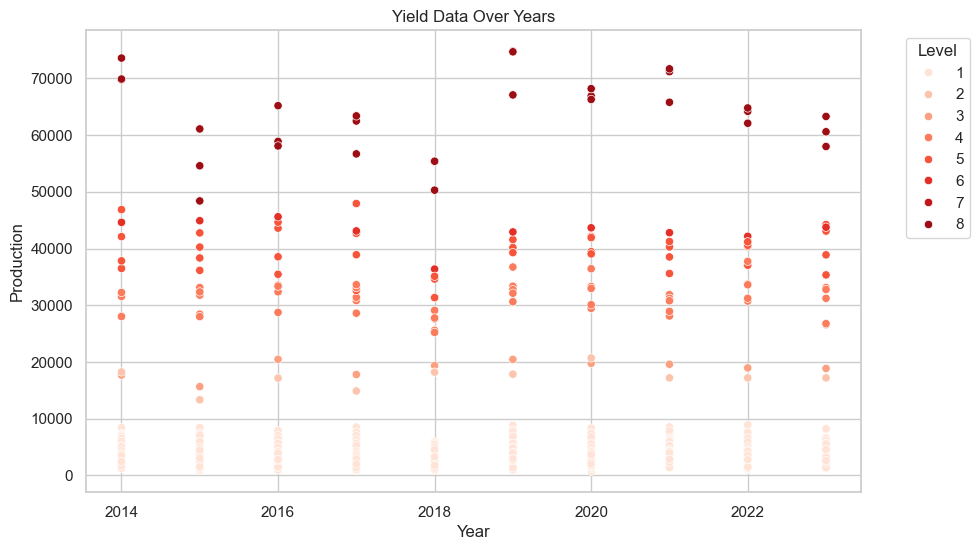

In [249]:
# Step 1: Melt the data
data_melted = pd.melt(
    data,
    id_vars=['region', 'crop'],
    value_vars=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
    var_name='year',
    value_name='production'
)

# Step 2: Convert year to numeric
data_melted['year'] = pd.to_numeric(data_melted['year'])

# Step 3: Calculate mean production per region-crop combo
mean_prod = data_melted.groupby(['region', 'crop'])['production'].mean().reset_index()
mean_prod.rename(columns={'production': 'mean_production'}, inplace=True)

# Step 4: Merge back to get mean_production in the melted data
data_melted = data_melted.merge(mean_prod, on=['region', 'crop'])

# Step 5: Create Levels
data_melted['Level'] = pd.cut(data_melted['mean_production'], bins=8, labels=range(1, 9)).astype('category')

# Step 6: Plot
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Reds", n_colors=8)
sns.scatterplot(
    data=data_melted,
    x='year',
    y='production',
    hue='Level',
    palette=palette,
    legend='full'
)

plt.legend(title='Level', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.title('Yield Data Over Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()


**8. Create a plot showing Mean Crop Production Over Time by Crop Type**

The provided code melts the dataset to long format, converts the year to datetime, cleans the data, and creates a line plot of mean crop production over time by crop type, with proper date formatting and plot styling.


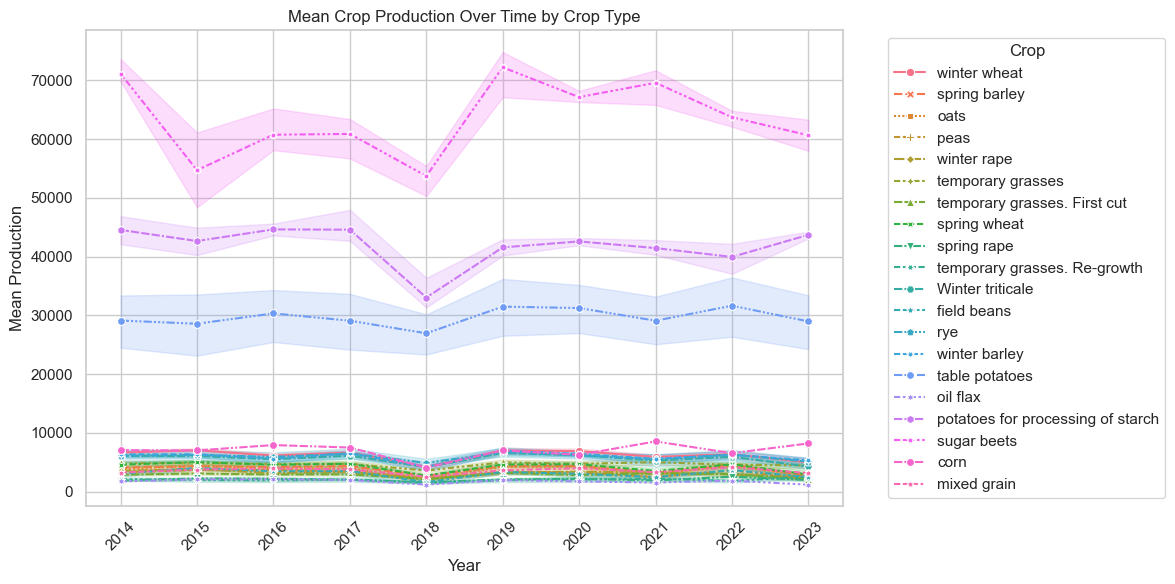

In [252]:
# Melt the dataset to long format for years and mean production
crop_agg = data.melt(id_vars=['crop'], 
                        value_vars=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
                        var_name='Year', 
                        value_name='Mean_Production')

# Convert Year to datetime for proper plotting
crop_agg['Year'] = pd.to_datetime(crop_agg['Year'])

# Convert Mean_Production to numeric, forcing errors to NaN
crop_agg['Mean_Production'] = pd.to_numeric(crop_agg['Mean_Production'], errors='coerce')

# Drop rows with NaN values in Mean_Production
crop_agg = crop_agg.dropna(subset=['Mean_Production'])

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=crop_agg, x='Year', y='Mean_Production', hue='crop', style='crop', markers=True)

# Set the y-axis limits to
y='mean_production'

# Set the x-axis date format
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())

# Apply theme
plt.title('Mean Crop Production Over Time by Crop Type')
plt.xlabel('Year')
plt.ylabel('Mean Production')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


**9. Create the same plot with confidence intervals!**

The code prepares the data by melting it into a long format, calculates the mean production and 95% confidence intervals (CI) for each crop by year, and then plots the mean production with shaded confidence intervals.

     Year                          crop         Mean          CI         ymin  \
0    2014              Winter triticale  6096.666667  355.823832  5740.842835   
1    2014                          corn  7060.000000         NaN          NaN   
2    2014                   field beans  3056.833333  441.106093  2615.727240   
3    2014                   mixed grain  3260.000000         NaN          NaN   
4    2014                          oats  3882.117647  324.993156  3557.124491   
..    ...                           ...          ...         ...          ...   
195  2023  temporary grasses. First cut  2108.947368  121.007332  1987.940036   
196  2023  temporary grasses. Re-growth  2571.333333  461.122437  2110.210897   
197  2023                 winter barley  5333.333333  509.767494  4823.565839   
198  2023                   winter rape  2371.666667  336.146479  2035.520188   
199  2023                  winter wheat  4983.750000  711.273160  4272.476840   

            ymax  
0    645

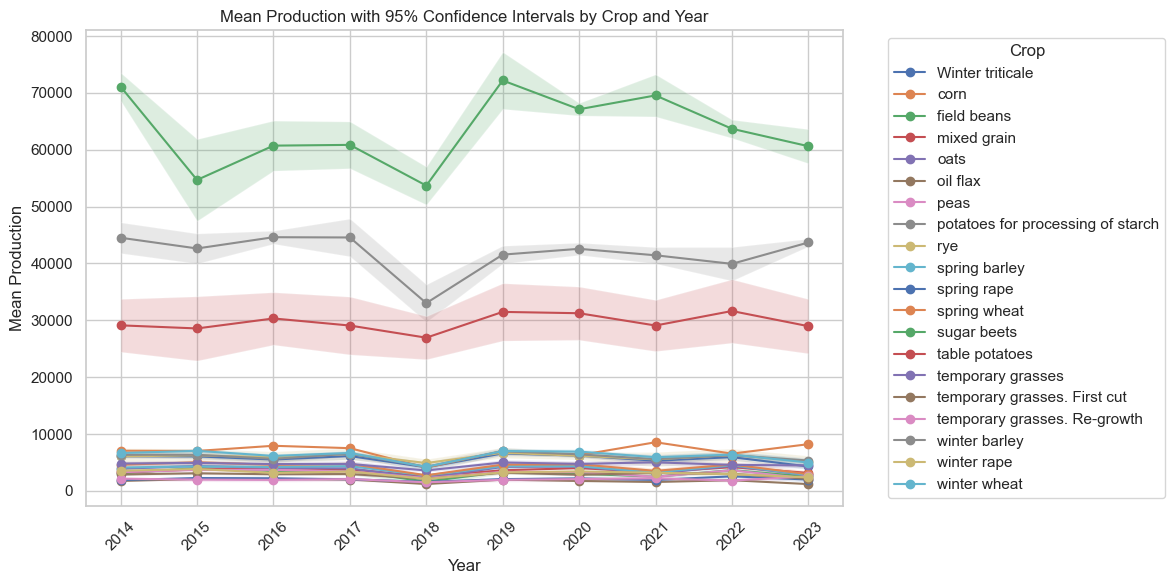

In [251]:
# Prepare Data for Plotting
# Calculate the mean and confidence intervals for each crop by year
def computeCI(data):
    se = np.std(data, ddof=1) / np.sqrt(len(data))
    ci = se * 1.96  # Using 1.96 for 95% confidence
    return ci

# Melt the DataFrame to long format for easier plotting
data_long = data.melt(id_vars=['region', 'crop'], 
                      value_vars=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
                      var_name='Year', value_name='Production')

# Group by year and crop, then calculate mean and confidence intervals
agg_data = data_long.groupby(['Year', 'crop']).agg(
    Mean=('Production', 'mean'),
    CI=('Production', computeCI)
).reset_index()

# Calculate ymin and ymax for confidence intervals
agg_data['ymin'] = agg_data['Mean'] - agg_data['CI']
agg_data['ymax'] = agg_data['Mean'] + agg_data['CI']

# Display the Aggregated Data Table
print(agg_data)

# Create the plot
plt.figure(figsize=(12, 6))
for crop in agg_data['crop'].unique():
    subset = agg_data[agg_data['crop'] == crop]
    plt.plot(subset['Year'], subset['Mean'], marker='o', label=crop)
    plt.fill_between(subset['Year'], subset['ymin'], subset['ymax'], alpha=0.2)

# Customize the plot
plt.title('Mean Production with 95% Confidence Intervals by Crop and Year')
plt.xlabel('Year')
plt.ylabel('Mean Production')
plt.xticks(rotation=45)
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




- - -

In [ ]:
# Saving the environment
!pip freeze > environment.txt

- - -